In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import utils_plot as ut

In [29]:
train=pd.read_csv('./drugsCom_raw/drugsComTrain_raw.tsv', sep='\t', index_col=0)

In [30]:
train.head(5)

,drugName,condition,review,rating,date,usefulCount
206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27
95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192
92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17
138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10
35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37


In [31]:
train.shape

(161297, 6)

In [32]:
train.date=pd.to_datetime(train.date)

In [33]:
train.head(5)

,drugName,condition,review,rating,date,usefulCount
206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,2012-05-20,27
95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,2010-04-27,192
92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,2009-12-14,17
138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,2015-11-03,10
35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,2016-11-27,37


In [55]:
train.drugName.value_counts()[:20]

Levonorgestrel                        3657
Etonogestrel                          3336
Ethinyl estradiol / norethindrone     2850
Nexplanon                             2156
Ethinyl estradiol / norgestimate      2117
Ethinyl estradiol / levonorgestrel    1888
Phentermine                           1543
Sertraline                            1360
Escitalopram                          1292
Mirena                                1242
Implanon                              1102
Gabapentin                            1047
Bupropion                             1022
Venlafaxine                           1016
Miconazole                            1000
Medroxyprogesterone                    995
Citalopram                             995
Lexapro                                952
Bupropion / naltrexone                 950
Duloxetine                             934
Name: drugName, dtype: int64

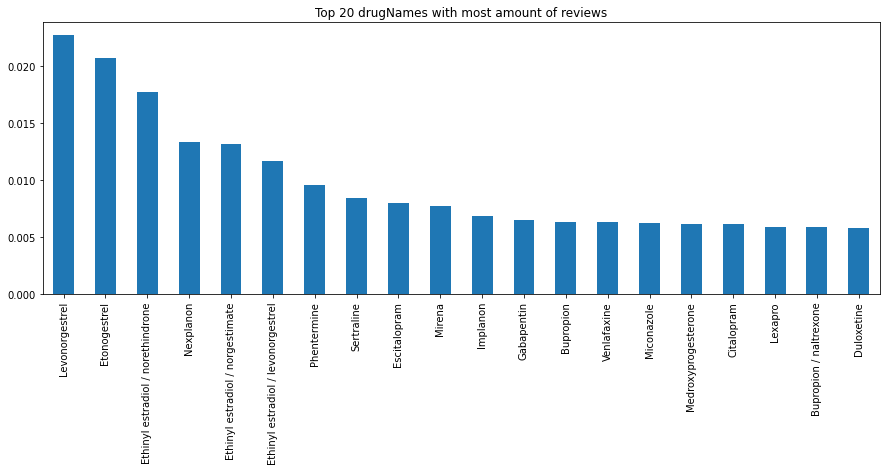

In [5]:
figure(figsize=(15, 5))


prob = train.drugName.value_counts(normalize=True)
threshold = 0.0005
mask = prob > threshold
tail_prob = prob.loc[~mask].sum()
prob = prob.loc[mask].head(20)
#prob['other'] = tail_prob
prob.plot(kind='bar', title="Top 20 drugNames with most amount of reviews")
plt.xticks(rotation=90)
plt.show()

In [6]:
train.sample(5)

,drugName,condition,review,rating,date,usefulCount
53167,Ceftriaxone,Urinary Tract Infection,"""Because of chronic UTIs in my past, I had dev...",8.0,"December 30, 2016",19
98768,Nexplanon,Birth Control,"""The past three years I used Implanon, the fir...",10.0,"September 3, 2013",15
39352,Contrave,Weight Loss,"""I have been taking contrave for a little over...",10.0,"December 20, 2016",57
175151,Relistor,"Constipation, Drug Induced","""I&#039;ve been on hydromorphone 2 mg (Q 4 H),...",10.0,"December 7, 2015",16
179085,Olanzapine,Insomnia,"""I have suffered from terrible insomnia for qu...",7.0,"September 22, 2017",4


In [56]:
train.condition.value_counts()[:20]

Birth Control                28788
Depression                    9069
Pain                          6145
Anxiety                       5904
Acne                          5588
Bipolar Disorde               4224
Insomnia                      3673
Weight Loss                   3609
Obesity                       3568
ADHD                          3383
Diabetes, Type 2              2554
Emergency Contraception       2463
High Blood Pressure           2321
Vaginal Yeast Infection       2274
Abnormal Uterine Bleeding     2096
Bowel Preparation             1859
ibromyalgia                   1791
Smoking Cessation             1780
Migraine                      1694
Anxiety and Stress            1663
Name: condition, dtype: int64

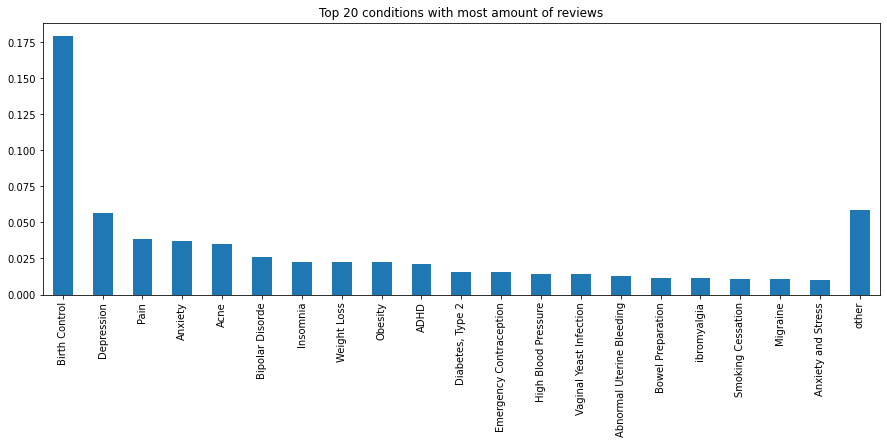

In [8]:
figure(figsize=(15, 5))

prob = train.condition.value_counts(normalize=True)
threshold = 0.0005
mask = prob > threshold
tail_prob = prob.loc[~mask].sum()
prob = prob.loc[mask].head(20)
prob['other'] = tail_prob
prob.plot(kind='bar', title="Top 20 conditions with most amount of reviews")
plt.xticks(rotation=90)
plt.show()

In [12]:
train.corr()

,rating,usefulCount
rating,1.000000,0.234185
usefulCount,0.234185,1.000000


/Users/joselopez/Desktop/Master/utils_plot.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna('columns') # drop columns with NaN


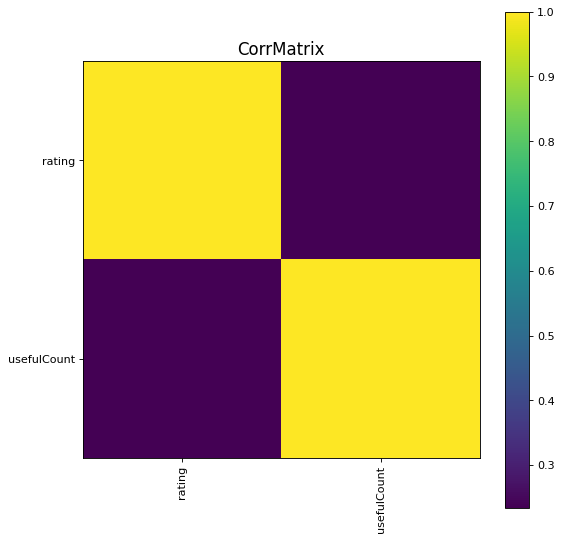

In [10]:
ut.plotCorrelationMatrix(df=train, graphWidth=8, title='CorrMatrix')

<AxesSubplot:xlabel='rating', ylabel='usefulCount'>

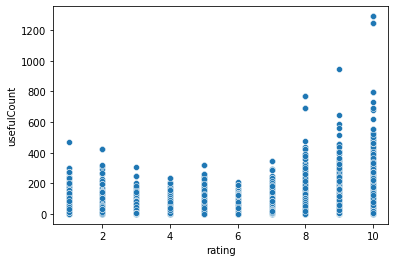

In [24]:
sns.scatterplot(data=train.reset_index(), x='rating', y='usefulCount')

In [34]:
train

,drugName,condition,review,rating,date,usefulCount
206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,2012-05-20,27
95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,2010-04-27,192
92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,2009-12-14,17
138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,2015-11-03,10
35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,2016-11-27,37
...,...,...,...,...,...,...
191035,Campral,Alcohol Dependence,"""I wrote my first report in Mid-October of 201...",10.0,2015-05-31,125
127085,Metoclopramide,Nausea/Vomiting,"""I was given this in IV before surgey. I immed...",1.0,2011-11-01,34
187382,Orencia,Rheumatoid Arthritis,"""Limited improvement after 4 months, developed...",2.0,2014-03-15,35
47128,Thyroid desiccated,Underactive Thyroid,"""I&#039;ve been on thyroid medication 49 years...",10.0,2015-09-19,79


In [36]:
train.groupby(by=['drugName','condition']).mean()

,,rating,usefulCount
drugName,condition,,
A + D Cracked Skin Relief,Bacterial Skin Infection,10.000000,6.000000
A / B Otic,Otitis Media,10.000000,20.000000
Abacavir / dolutegravir / lamivudine,HIV Infection,8.211538,12.500000
Abacavir / lamivudine / zidovudine,HIV Infection,9.000000,1.000000
Abatacept,Juvenile Idiopathic Arthritis,7.000000,9.000000
...,...,...,...
depo-subQ provera 104,Birth Control,1.000000,0.000000
ella,Emergency Contraception,6.980392,9.509804
femhrt,0</span> users found this comment helpful.,1.000000,0.000000


<AxesSubplot:xlabel='date', ylabel='rating'>

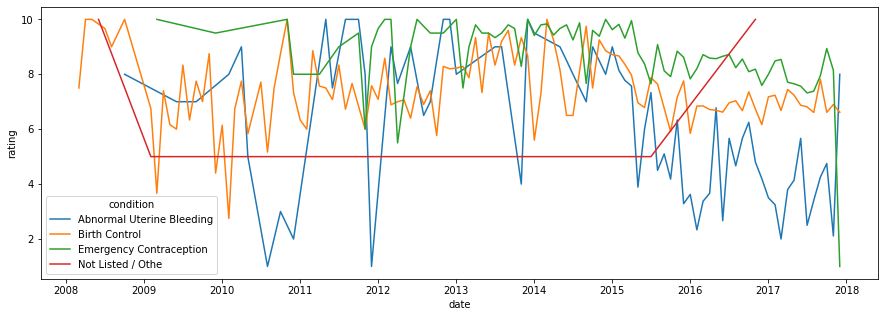

In [51]:
figure(figsize=(15, 5))

sns.lineplot(data=train.groupby(by=['drugName','condition',pd.Grouper(key='date', freq='MS')]).mean().reset_index().\
query("drugName=='Levonorgestrel'"), x='date', y='rating', hue='condition')

<AxesSubplot:xlabel='date', ylabel='rating'>

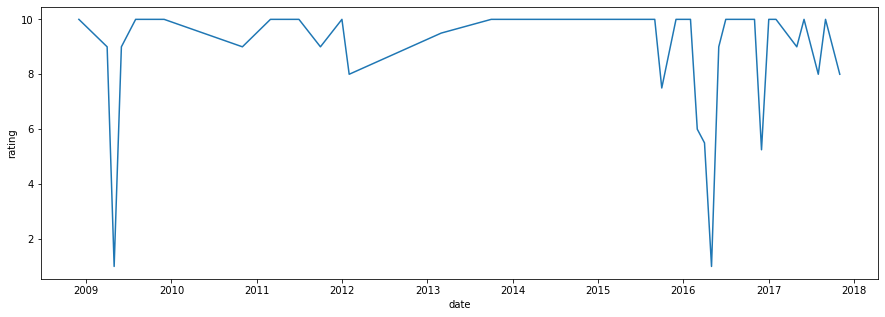

In [53]:

figure(figsize=(15, 5))

sns.lineplot(data=train.groupby(by=['drugName',pd.Grouper(key='date', freq='MS')]).mean().reset_index().\
query("drugName=='Ceftriaxone'"), x='date', y='rating')

<AxesSubplot:xlabel='date', ylabel='rating'>

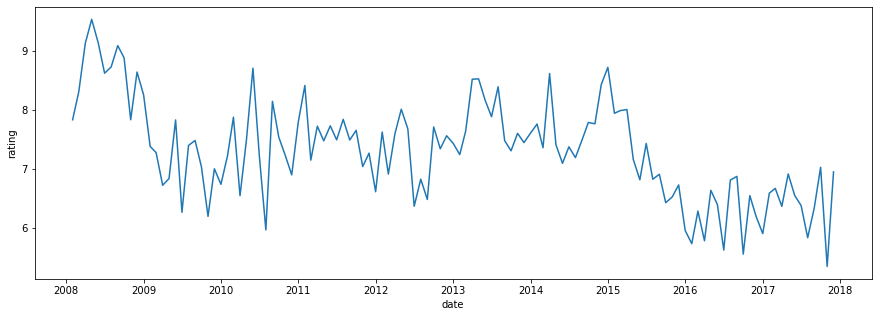

In [61]:
figure(figsize=(15, 5))

sns.lineplot(data=train.groupby(by=['condition',pd.Grouper(key='date', freq='MS')]).mean().reset_index().\
query("condition=='Depression'"), x='date', y='rating')

<AxesSubplot:xlabel='date', ylabel='rating'>

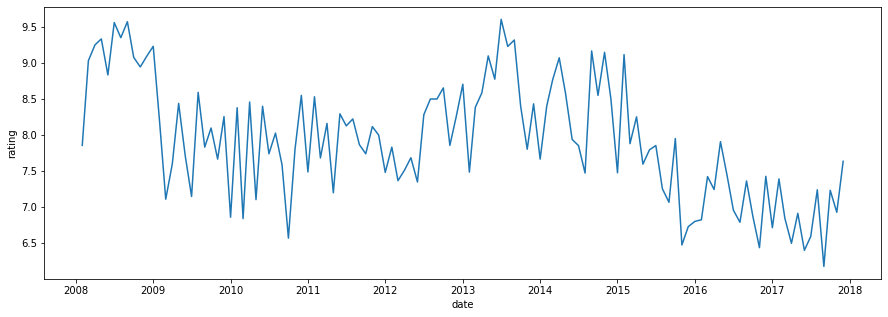

In [62]:
figure(figsize=(15, 5))

sns.lineplot(data=train.groupby(by=['condition',pd.Grouper(key='date', freq='MS')]).mean().reset_index().\
query("condition=='Anxiety'"), x='date', y='rating')

<AxesSubplot:xlabel='date', ylabel='rating'>

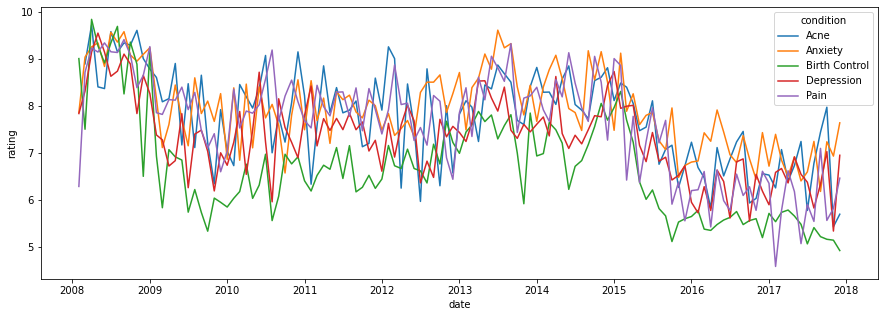

In [71]:
figure(figsize=(15, 5))

sns.lineplot(data=train.groupby(by=['condition',pd.Grouper(key='date', freq='MS')]).mean().reset_index().\
query("condition in ['Birth Control', 'Depression', 'Pain', 'Anxiety', 'Acne']"), x='date', y='rating', hue='condition')

In [68]:
train.condition.value_counts()[:5].index

Index(['Birth Control', 'Depression', 'Pain', 'Anxiety', 'Acne'], dtype='object')

In [77]:
train.groupby(by=['drugName','condition'])[['review']].count()

,,review
drugName,condition,
A + D Cracked Skin Relief,Bacterial Skin Infection,1
A / B Otic,Otitis Media,1
Abacavir / dolutegravir / lamivudine,HIV Infection,52
Abacavir / lamivudine / zidovudine,HIV Infection,1
Abatacept,Juvenile Idiopathic Arthritis,2
...,...,...
depo-subQ provera 104,Birth Control,1
ella,Emergency Contraception,51
femhrt,0</span> users found this comment helpful.,1


In [82]:
pd.merge(train.groupby(by=['drugName','condition'])[['review']].count(), train.groupby(by=['drugName','condition'])[['rating']].mean(), left_index=True, right_index=True).sort_values(by='review',ascending=False).head(15)

,,review,rating
drugName,condition,,
Etonogestrel,Birth Control,3314,5.808992
Ethinyl estradiol / norethindrone,Birth Control,2337,5.658537
Nexplanon,Birth Control,2149,5.679851
Levonorgestrel,Birth Control,2129,7.061062
Ethinyl estradiol / levonorgestrel,Birth Control,1600,5.903125
Ethinyl estradiol / norgestimate,Birth Control,1580,5.933544
Levonorgestrel,Emergency Contraception,1221,8.472563
Phentermine,Weight Loss,1211,8.799339
Implanon,Birth Control,1095,6.073059


In [75]:
train.groupby(by=['drugName','condition'])[['rating']].mean()

,,rating
drugName,condition,
A + D Cracked Skin Relief,Bacterial Skin Infection,10.000000
A / B Otic,Otitis Media,10.000000
Abacavir / dolutegravir / lamivudine,HIV Infection,8.211538
Abacavir / lamivudine / zidovudine,HIV Infection,9.000000
Abatacept,Juvenile Idiopathic Arthritis,7.000000
...,...,...
depo-subQ provera 104,Birth Control,1.000000
ella,Emergency Contraception,6.980392
femhrt,0</span> users found this comment helpful.,1.000000
